In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [42]:
def plot_series(data, x_lab, y_lab, title, file_name, loc, scatter=False, grid=False):
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 8, forward=True)

  for d in data:
    if scatter:
      plt.scatter(d[0], d[1], alpha=0.8, label=d[2])
    else:
      plt.plot(d[0], d[1], alpha=0.8, label=d[2])

  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc=loc, prop={'size': 16})
  if grid:
    # plt.grid(axis='x', color='0.95')
    # plt.grid(axis='x', which='major', color='k', linestyle='-')
    plt.grid(axis='x', which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(axis='x', which='minor', color='r', linestyle='-', alpha=0.2)
    plt.minorticks_on()

  plt.savefig(f'./visualization/mnist/{file_name}.pdf', dpi=300, transparent=True)
  plt.show()

In [43]:
full = np.load("./tmp/mnist_1.0_grd_normw_5.npz")
random = np.load("./tmp/mnist_0.5_random_wor_5.npz")
craig = np.load("./tmp/mnist_0.5_grd_normw_5.npz")

craig['grd_time']

array([[ 9.3762536 , 14.51845646, 17.3389473 , 15.5963521 , 19.73887205,
        17.58035707, 11.90971994, 17.39395285, 17.55413938, 12.70047498,
        15.87965846, 14.98360419, 15.17899513, 14.08758807, 15.80310583],
       [13.41315031, 18.32128572, 12.99606466, 16.04999185, 15.08966875,
        14.70338607, 14.70253205, 11.44307375, 13.18468785, 13.27680779,
        12.2856369 , 14.02356672, 14.40445161, 13.96483827, 13.90044475],
       [14.24291754, 13.21035981, 13.74037313, 12.64186692, 13.54959989,
        13.60185623, 12.22296429, 13.14390969, 12.34928989, 12.73914433,
        12.77351213, 12.5654006 , 12.41740131, 10.83262587, 12.26435256],
       [15.56344104, 12.6634171 , 12.75367737, 12.4309268 , 13.35422015,
        12.31902862, 10.92305398, 12.50051498, 12.11404467, 11.32237005,
        11.60990882, 11.97448921, 12.22742271, 13.07913446, 11.36480355],
       [15.66256762, 12.25869489, 12.82023621, 12.26572824, 11.4473784 ,
        11.29798746, 12.69243813, 11.65515018, 

In [39]:
epochs = 15
runs = 5

full_acc = []
random_acc = []
craig_acc = []

full_time = np.zeros(epochs)
random_time = np.zeros(epochs)
craig_time = np.zeros(epochs)

full_acc_avg = []
random_acc_avg = []
craig_acc_avg = []

full_time_cum = []
random_time_cum = []
craig_time_cum = []

for run in range(runs):
    full_acc_avg.append(full['test_acc'][run])
    random_acc_avg.append(random['test_acc'][run])
    craig_acc_avg.append(craig['test_acc'][run])
    
    #cumilative sum of time
    full_time_cum.append(full['train_time'][run] + full['grd_time'][run] + full['sim_time'][run])
    random_time_cum.append(random['train_time'][run]+random['grd_time'][run]+random['sim_time'][run]+random['pred_time'][run])
    craig_time_cum.append(craig['train_time'][run]+craig['grd_time'][run]+craig['sim_time'][run]+craig['pred_time'][run])
    
full_acc = np.array(full_acc_avg).mean(axis=0)
random_acc = np.array(random_acc_avg).mean(axis=0)
craig_acc = np.array(craig_acc_avg).mean(axis=0)
    
full_time_cum = np.array(full_time_cum).mean(axis=0)
random_time_cum = np.array(random_time_cum).mean(axis=0)
craig_time_cum = np.array(craig_time_cum).mean(axis=0)

for epoch in range(epochs):
    full_time[epoch] = full_time_cum[:epoch+1].sum()
    random_time[epoch] = random_time_cum[:epoch+1].sum()
    craig_time[epoch] = craig_time_cum[:epoch+1].sum()
        
        
print(full_time_cum, full_time)
print(random_time_cum, random_time)
print(craig_time_cum, craig_time)
print(full_acc)
print(random_acc)
print(craig_acc)

[2.90270996 2.79950013 2.80112567 2.80348997 2.80255203 2.80309711
 2.79707212 2.80459156 2.80326328 2.79714355 2.80320587 2.80105567
 2.79920864 2.79649282 2.80188093] [ 2.90270996  5.70221009  8.50333576 11.30682573 14.10937777 16.91247487
 19.709547   22.51413856 25.31740184 28.11454539 30.91775126 33.71880693
 36.51801558 39.31450839 42.11638932]
[2.85646815 1.38170443 1.37986145 1.38055582 1.37929459 1.37937226
 1.37804675 1.38012161 1.37452388 1.37590423 1.37332511 1.37576747
 1.37245011 1.3740046  1.37213821] [ 2.85646815  4.23817258  5.61803403  6.99858985  8.37788444  9.7572567
 11.13530345 12.51542506 13.88994894 15.26585317 16.63917828 18.01494575
 19.38739586 20.76140046 22.13353868]
[17.70123978 16.71733575 16.26727238 16.30139537 16.91698613 16.26548724
 14.87808938 15.66347041 15.97469816 14.29378958 15.39039202 15.55079651
 15.44835563 15.0827394  14.90955434] [ 17.70123978  34.41857553  50.6858479   66.98724327  83.9042294
 100.16971664 115.04780602 130.71127644 146.68

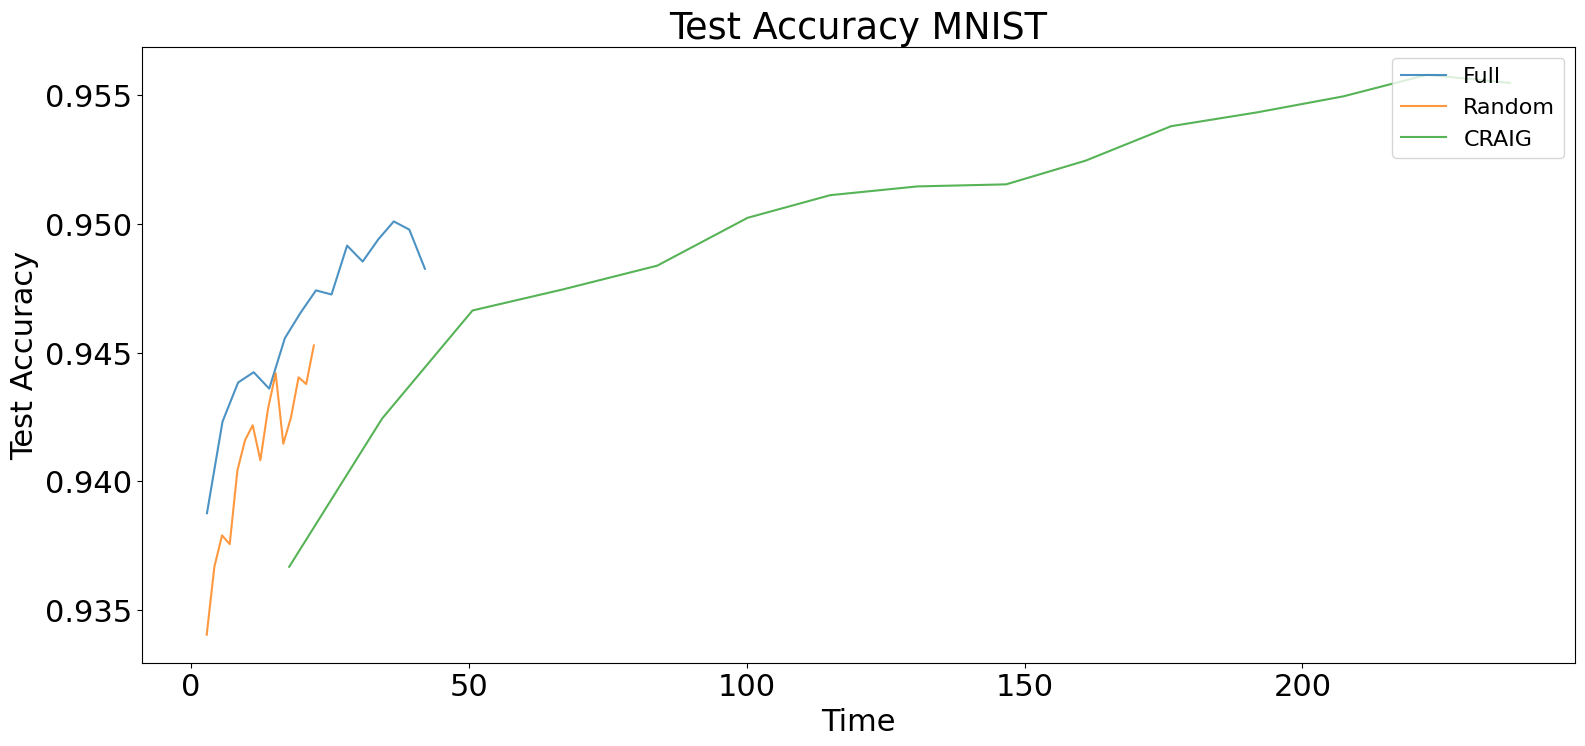

In [40]:
series_list = [
    (full_time, full_acc, "Full"),
    (random_time, random_acc, "Random"),
    (craig_time, craig_acc, "CRAIG")
]

plt.rcParams.update({'font.size': 22})

plot_series(data=series_list, x_lab="Time", y_lab="Test Accuracy",
            title="Test Accuracy MNIST", file_name=f"mnist_{epochs}_{runs}", 
            loc="upper right")